- https://medium.com/@stepanfilonov/tracking-your-eyes-with-python-3952e66194a6
- https://github.com/stepacool/Eye-Tracker

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [3]:
filename = '../dataset/center/2018-09-04_Laurent_104.png' 
filename = '../dataset/center/2018-09-04_Laurent_6.png' 
threshold = 130

# Rapidement

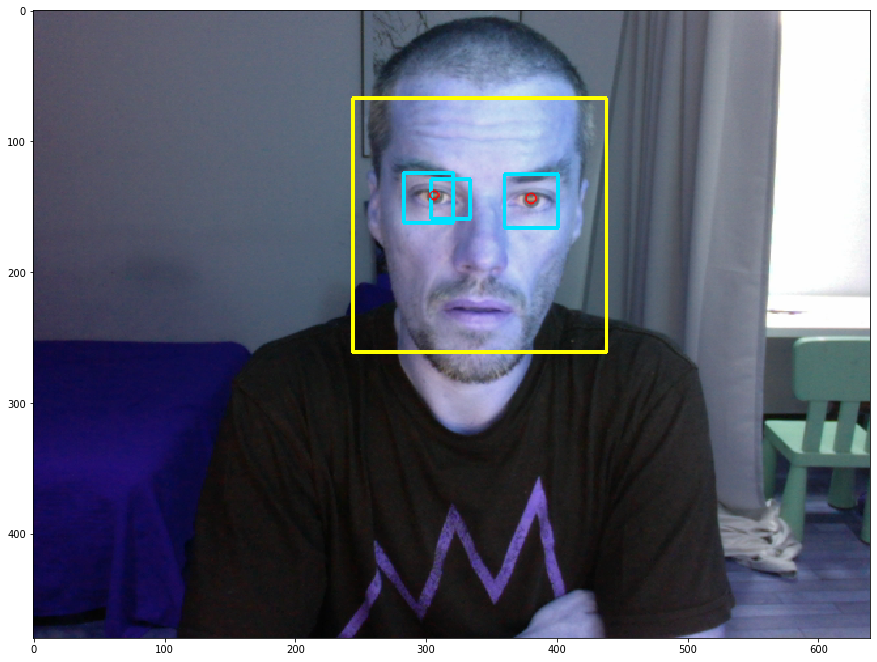

In [4]:
fig, ax = plt.subplots(1,1,figsize=(15,15))

img = cv2.imread(filename)
gray_picture = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#make picture gray
faces = face_cascade.detectMultiScale(gray_picture, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
    
gray_face = gray_picture[y:y+h, x:x+w] # cut the gray face frame out
face = img[y:y+h, x:x+w] # cut the face frame out
eyes = eye_cascade.detectMultiScale(gray_face)


for (ex,ey,ew,eh) in eyes: 
    cv2.rectangle(face,(ex,ey),(ex+ew,ey+eh),(0,225,255),2)
#cv2.imshow('my image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()



detector_params = cv2.SimpleBlobDetector_Params()
detector_params.filterByArea = True
detector_params.maxArea = 1500
detector = cv2.SimpleBlobDetector_create(detector_params)

def blob_process(img, detector):
    gray_frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img = cv2.threshold(gray_frame, threshold, 255, cv2.THRESH_BINARY)
    img = cv2.erode(img, None, iterations=2) #1
    img = cv2.dilate(img, None, iterations=4) #2
    img = cv2.medianBlur(img, 5) #3
    keypoints = detector.detect(img)
    return keypoints


for (ex,ey,ew,eh) in eyes: 
    eye = face[ey:ey+eh, ex:ex+ew]
    keypoints = blob_process(eye, detector)
    cv2.drawKeypoints(eye, keypoints, eye, (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img);

# Fonction

In [5]:
def detect_faces(img, cascade):
    gray_frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    coords = cascade.detectMultiScale(gray_frame, 1.3, 5)
    if len(coords) > 1:
        biggest = (0, 0, 0, 0)
        for i in coords:
            if i[3] > biggest[3]:
                biggest = i
        biggest = np.array([i], np.int32)
    elif len(coords) == 1:
        biggest = coords
    else:
        return None
    for (x, y, w, h) in biggest:
        frame = img[y:y + h, x:x + w]
    return frame

def detect_eyes(img, cascade):
    gray_frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    eyes = cascade.detectMultiScale(gray_frame, 1.3, 5) # detect eyes
    width = np.size(img, 1) # get face frame width
    height = np.size(img, 0) # get face frame height
    left_eye = None
    right_eye = None
    for (x, y, w, h) in eyes:
        if y > height / 2:
            pass
        eyecenter = x + w / 2  # get the eye center
        if eyecenter < width * 0.5:
            left_eye = img[y:y + h, x:x + w]
        else:
            right_eye = img[y:y + h, x:x + w]
    return left_eye, right_eye

def cut_eyebrows(img):
    height, width = img.shape[:2]
    eyebrow_h = int(height / 4)
    img = img[eyebrow_h:height-eyebrow_h, 0:width]  # cut eyebrows out (15 px)
    return img

detector_params = cv2.SimpleBlobDetector_Params()
detector_params.filterByArea = True
detector_params.maxArea = 1500
detector = cv2.SimpleBlobDetector_create(detector_params)

def blob_process(img, detector, threshold):
    gray_frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img = cv2.threshold(gray_frame, threshold, 255, cv2.THRESH_BINARY)
    
    img = cv2.erode(img, None, iterations=2) #1
    img = cv2.dilate(img, None, iterations=4) #2
    img = cv2.medianBlur(img, 5) #3
    keypoints = detector.detect(img)
    return keypoints

Text(0.5, 1.0, 'right_eye_cut')

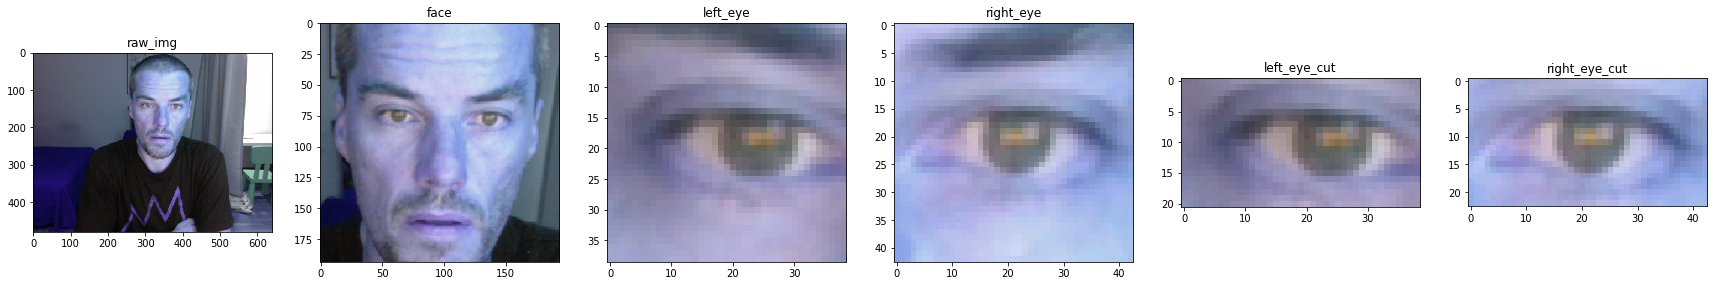

In [6]:
fig, ax = plt.subplots(1,6, figsize=(30,30))

img = cv2.imread(filename)
ax[0].imshow(img)
ax[0].set_title('raw_img')

face = detect_faces(img, face_cascade)
ax[1].imshow(face)
ax[1].set_title('face')

left_eye_, right_eye_ = detect_eyes(face, eye_cascade)
ax[2].imshow(left_eye_)
ax[2].set_title('left_eye')
ax[3].imshow(right_eye_)
ax[3].set_title('right_eye')


left_eye, right_eye = cut_eyebrows(left_eye_), cut_eyebrows(right_eye_)
ax[4].imshow(left_eye)
ax[4].set_title('left_eye_cut')
ax[5].imshow(right_eye)
ax[5].set_title('right_eye_cut')

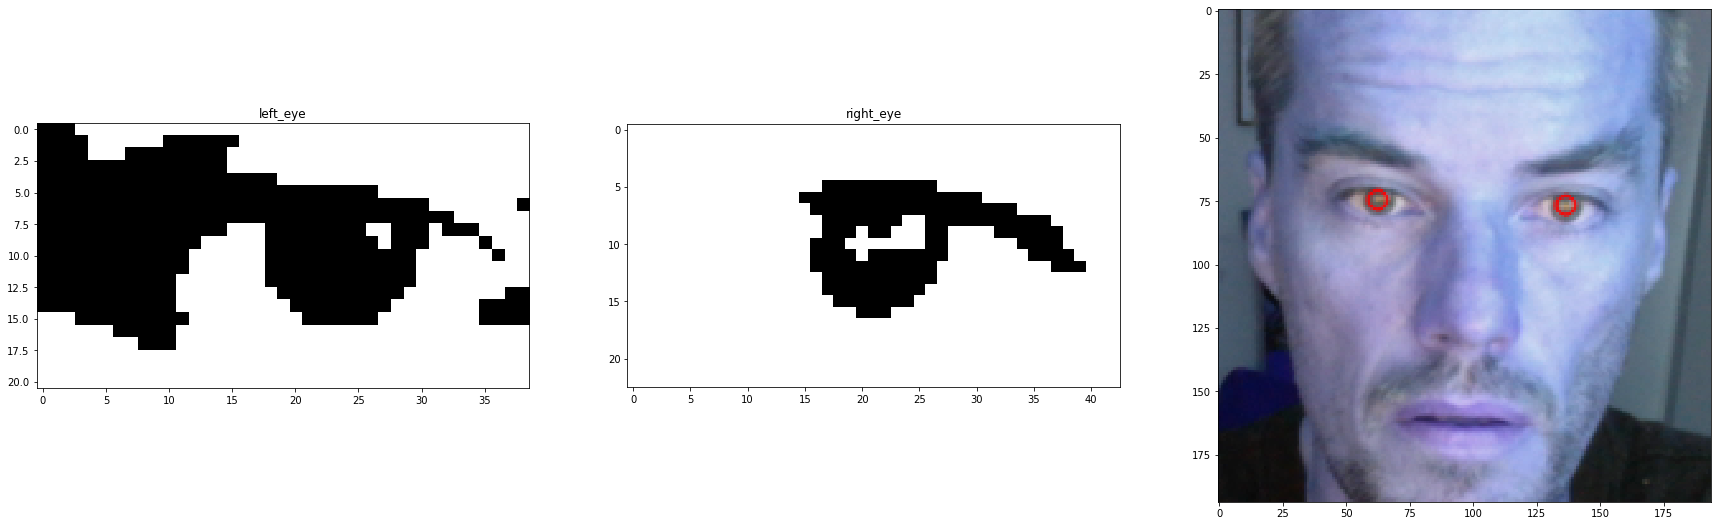

In [7]:
fig, ax = plt.subplots(1,3, figsize=(30,30))

for (n, e), title in zip(enumerate([left_eye, right_eye]), ['left_eye', 'right_eye']) :
    eye = cv2.cvtColor(e, cv2.COLOR_BGR2GRAY)
    _, i = cv2.threshold(eye, threshold, 255, cv2.THRESH_BINARY)

    ax[n].imshow(i, cmap='gray')
    ax[n].set_title(title)
    
    keypoints = blob_process(e, detector, threshold=threshold)
    #print(keypoints)
    cv2.drawKeypoints(e, keypoints, e, (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
ax[2].imshow(face)

In [8]:
print(keypoints[0].pt, keypoints[0].size)

(21.286163330078125, 9.698304176330566) 7.444185256958008
